# NLP - Sentiment Analysis and Classification Project

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

The models which will be built in this project include: 

    1 - Machine Learning algorithms:
            -- Logistic Regression, 
            -- Naive Bayes, 
            -- Support Vector Machine, 
            -- Random Forest, 
            --Ada Boosting, 
    
    2 - Deep Learning algorithms 
    3 - BERT algorithm.




---
---


# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

[Source for the dataset]((https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.)

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.

Project Structure is separated in five tasks: 

- EDA, 
- Feature Selection and Data Cleaning , 
- Text Mining, 
- Word Cloud 
- Sentiment Classification with Machine Learning, 
- Deep Learning and 
- BERT model


---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [124]:
# connect to g-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# import tensorflow and os
# connect to TPU
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [125]:
# import required libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [126]:
# import required packages for preparing the data to DL operations
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [127]:
# read and load the data to a data frame
df = pd.read_csv("/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [128]:
# drop the redundant unnnamed feature
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

Data wrangling, genellikle verinin toplanması, temizlenmesi, ve düzenlenmesi gibi pre-processing(ön işleme) adımlarını içerir. Bu süreçte hedef, verinin sonraki aşamalar için kullanılabilir ve anlamlı bir forma dönüştürülmesidir.

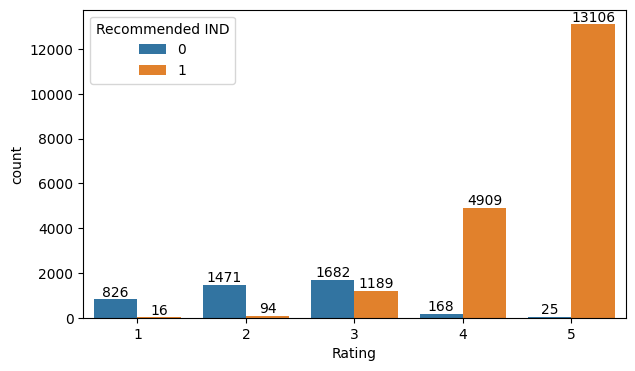

In [129]:
# display the ratings for each recommendation class
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", 
                   data=df, 
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [130]:
# target feature and classes
df["Recommended IND"].unique()

array([1, 0])

There are some conflicts between the rating and target features. If a customer recommends a cloth but gives 1-2 as rating vice versa, then these kinds of observations will be removed to have a "cleaner" negative class (target).

In [131]:
len(df)

23486

In [132]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [133]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [134]:
# remove the observation which containns contradictions between rating score and recommendation
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

# Since the data is imbalanced and the target class (negative recommendations) already consists of less observations
# I'll keep samples with  rating==3 and recom == 0

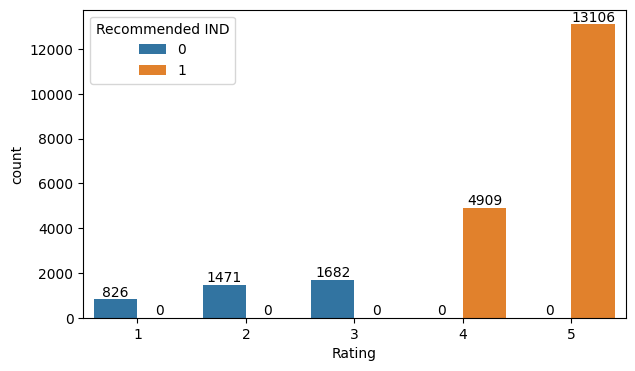

In [135]:
# display ratings for each class again
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", 
                   data=df, 
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating "Not Recommendation".

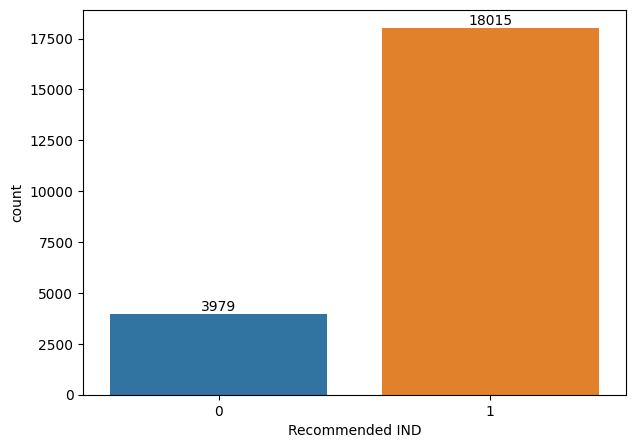

In [136]:
# display the classes with a count plot
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended IND", 
                   data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning


### Feature Selection and Rename Column Name

In [137]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, 
          inplace=True)

In [138]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [139]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [140]:
# check missing values
df.isnull().sum()

text     819
label      0
dtype: int64

In [141]:
# drop them and reset the index
df.dropna(inplace = True)
df.reset_index(drop=True, 
               inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


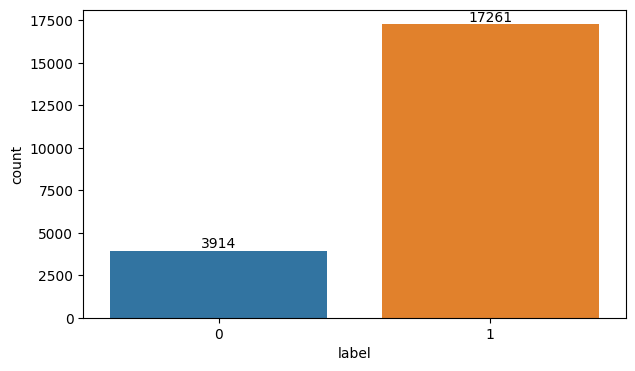

In [142]:
# display the number of observations for each class
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="label", 
                   data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization can be recommended for this case, because it will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step we are going to change text to tokens and convert all of the words to lower case.  Next we are going to remove punctuation, bad characters, numbers and stop words. The second step aims to normalize them through the Lemmatization method. 


***Note:*** *Functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** can be used for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [143]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [144]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We are going to create separate word clouds for positive and negative reviews. We will qualify a review as positive or negative, by looking at its recommended status.

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [25]:
# implement cleaning function to all positive reviews
positive_sentences = df[df["label"] == 1]["text"] 
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [26]:
# implement cleaning function to all negative reviews
negative_sentences = df[df["label"] == 0]["text"] 
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [27]:
# join the + reviews
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [28]:
# join the - reviews
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [29]:
# import wordcloud
from wordcloud import WordCloud

In [32]:
# wordcloud for positive reviews (most used 250 tokens)
wordcloud_positive = WordCloud(background_color="black", 
                               max_words =250, 
                               scale=3) # scale parameter for a more clear viz

In [33]:
# generate the wordcloud in line with the above function
wordcloud_positive.generate(positive_words)

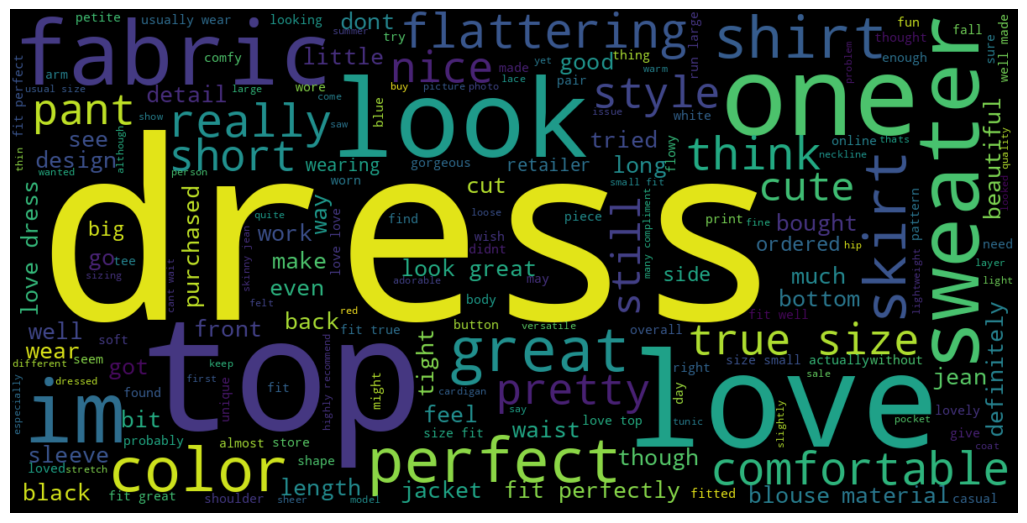

In [34]:
# display it
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, 
           interpolation="bilinear")
plt.axis("off")
plt.show()

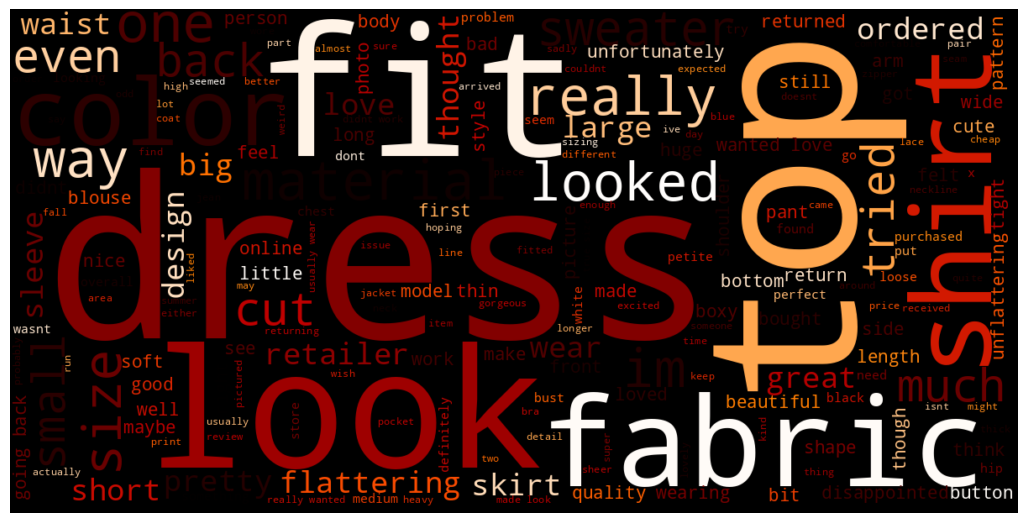

In [35]:
# wordcloud for negative reviews (most used 250 tokens)
wordcloud_negative = WordCloud(background_color="black", 
                               max_words=250, 
                               colormap='gist_heat', 
                               scale=3)

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, 
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps we need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. This will cretae a  matrix like a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 
**For BERT model, use TF tensor.**

After performing data preprocessing, build  models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
# split the data
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values # change the label of negative (target) class as 1

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    stratify=y, 
                                                    random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
vectorizer = CountVectorizer(preprocessor=cleaning, 
                             min_df=3, # ignore the tokens if they are less than 3
                             max_df=0.90) # ignore the tokens if they are in more than 90% of the all reviews
# fit-tranform train data and transform test data
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [150]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
# display the result
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
# same operations for TF-IDF
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, 
                                    min_df=3, 
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [154]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [155]:
pd.DataFrame(X_train_tf_idf.toarray(), 
             columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Evaluation functions

In [156]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [157]:
# create a user defined function

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [158]:
from sklearn.linear_model import LogisticRegression

# after trial and errors the parameters such as C and max_iter have been set as below:
log = LogisticRegression(C =0.01, 
                         max_iter=1000, 
                         class_weight= "balanced", # since the data is imbalanced
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [159]:
# show the evaluation metrics and compare test and train data
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1484  243]
 [  52  339]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.87      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.90      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.63      0.90      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [160]:
# cross validation to check overfitting

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, 
                           max_iter=1000, 
                           class_weight= "balanced", 
                           random_state=101)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

# no overfitting

test_accuracy      0.873906
train_accuracy     0.884131
test_f1            0.719061
train_f1           0.741943
test_recall        0.872542
train_recall       0.901000
test_precision     0.611845
train_precision    0.630623
dtype: float64

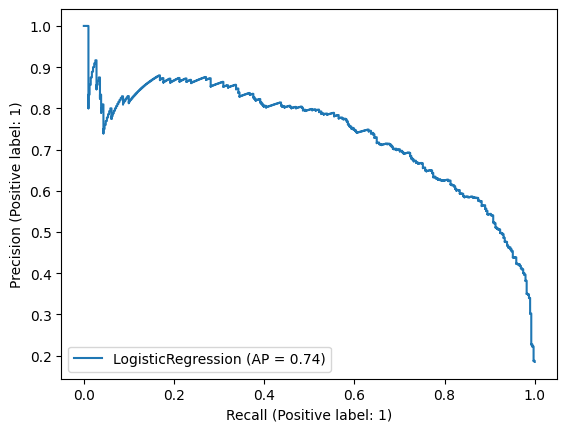

In [57]:
# display precision recall score for the imbalanced data

from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log, # when we use estimator, we shold also give the model inside
                                      X_test_count, 
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred); For from_prediction, we should first
# define y_pred outside of this code and use it here inside this function.Therefore, from_estimator 
# is a more efficient way to display precision recall curve

In [61]:
# save the metric scores to compare with other algorithms in the end
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [62]:
# build the logistic model for tf-idf vectorized data
log = LogisticRegression(C=0.06, 
                         max_iter=1000, 
                         random_state=101, 
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [63]:
# check the scores

print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1464  263]
 [  49  342]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1727
           1       0.57      0.87      0.69       391

    accuracy                           0.85      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.85      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15534
           1       0.61      0.90      0.73      3523

    accuracy                           0.88     19057
   macro avg       0.79      0.89      0.82     19057
weighted avg       0.91      0.88      0.88     19057



In [64]:
# cross val to check overfitting

model = LogisticRegression(C=0.06, 
                           max_iter=1000, 
                           random_state=101, 
                           class_weight="balanced")
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867084
train_accuracy     0.875158
test_f1            0.710168
train_f1           0.728379
test_recall        0.880782
train_recall       0.905447
test_precision     0.595173
train_precision    0.609239
dtype: float64

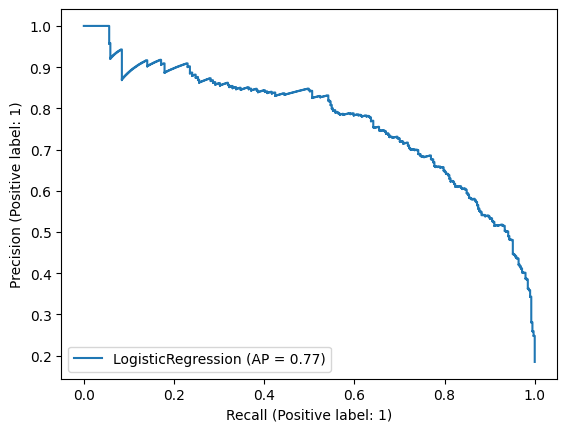

In [68]:
# general performace of the model
PrecisionRecallDisplay.from_estimator(log, 
                                      X_test_tf_idf, 
                                      y_test);

In [67]:
# save the scores
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [69]:
# gaussian naive  can't be used here since the data is imbalanced. Thus we'll use naive bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# after checking both multinomial and bernoulli, we got better scores qwith multinomial

nb = MultinomialNB(alpha=1.5) # alpha to change the weight of tokens if they have 0 probability

nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [70]:
# evaluationmetrics for train and test data
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1609  118]
 [  78  313]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.73      0.80      0.76       391

    accuracy                           0.91      2118
   macro avg       0.84      0.87      0.85      2118
weighted avg       0.91      0.91      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.76      0.84      0.80      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.93      0.92      0.92     19057



In [71]:
# check overfitting
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.906439
train_accuracy     0.922577
test_f1            0.757743
train_f1           0.799851
test_recall        0.791652
train_recall       0.836818
test_precision     0.726964
train_precision    0.766018
dtype: float64

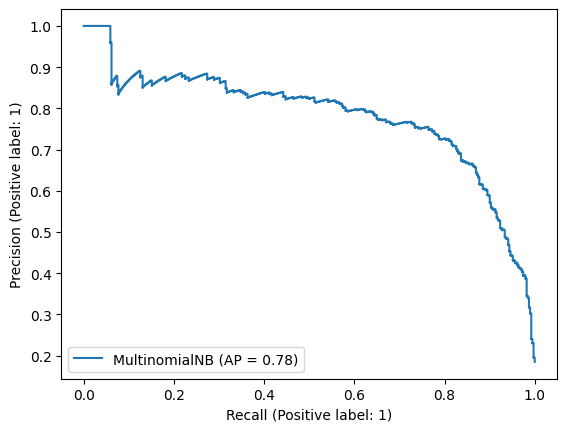

In [72]:
# general performance of the model is 0.78 to separate the classes from each other
PrecisionRecallDisplay.from_estimator(nb, 
                                      X_test_count, 
                                      y_test);

In [76]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [77]:
# TF_IDF gives higher scores with Bernoulli (alpha 0.7 after trying many options)
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [78]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)


NB MODEL
[[1599  128]
 [  77  314]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.71      0.80      0.75       391

    accuracy                           0.90      2118
   macro avg       0.83      0.86      0.85      2118
weighted avg       0.91      0.90      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.75      0.84      0.79      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [79]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.900876
train_accuracy     0.918933
test_f1            0.746102
train_f1           0.792657
test_recall        0.787679
train_recall       0.838206
test_precision     0.708829
train_precision    0.751806
dtype: float64

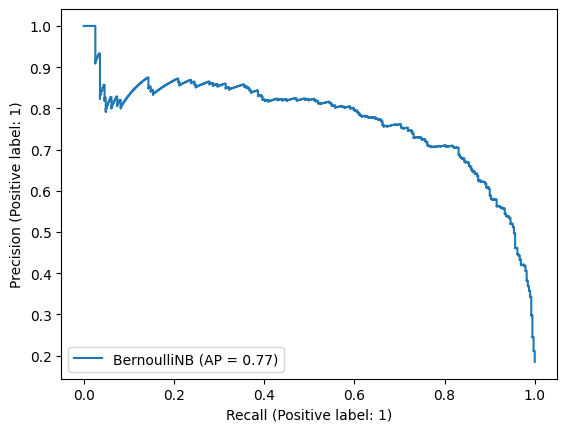

In [80]:
PrecisionRecallDisplay.from_estimator(nb, 
                                      X_test_tf_idf, 
                                      y_test);

In [82]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [83]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, 
                class_weight="balanced", 
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [84]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1484  243]
 [  53  338]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.86      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.64      0.90      0.75      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.89      0.84     19057
weighted avg       0.91      0.89      0.89     19057



In [85]:
model = LinearSVC(C=0.001, 
                  class_weight="balanced", 
                  random_state=101)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874902
train_accuracy     0.885612
test_f1            0.720888
train_f1           0.745156
test_recall        0.873676
train_recall       0.904595
test_precision     0.613916
train_precision    0.633506
dtype: float64

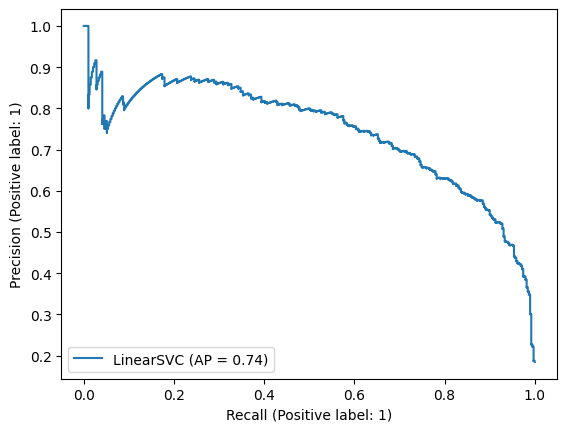

In [86]:
PrecisionRecallDisplay.from_estimator(svc, 
                                      X_test_count, 
                                      y_test);

In [91]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [92]:
svc = LinearSVC(C=0.03, 
                class_weight="balanced", 
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [93]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1496  231]
 [  40  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.60      0.90      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.91      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     15534
           1       0.66      0.93      0.77      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.91      0.85     19057
weighted avg       0.92      0.90      0.91     19057



In [94]:
model = LinearSVC(C=0.03, 
                  class_weight="balanced", 
                  random_state=101)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883666
train_accuracy     0.899022
test_f1            0.738228
train_f1           0.773624
test_recall        0.886735
train_recall       0.933327
test_precision     0.632754
train_precision    0.660593
dtype: float64

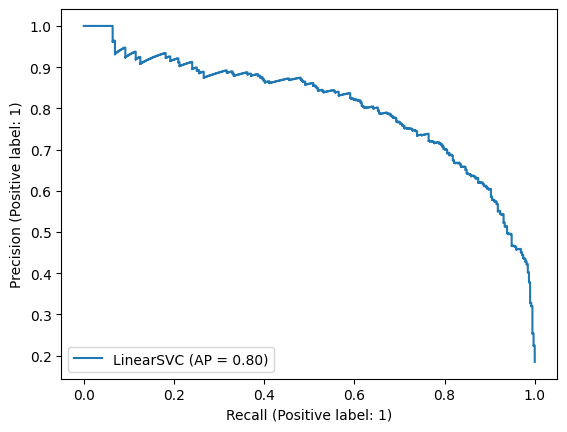

In [95]:
PrecisionRecallDisplay.from_estimator(svc, 
                                      X_test_tf_idf, 
                                      y_test);

In [96]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, 
                            max_depth = 7, 
                            random_state = 42, 
                            n_jobs = -1, 
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [99]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1458  269]
 [  61  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1727
           1       0.55      0.84      0.67       391

    accuracy                           0.84      2118
   macro avg       0.76      0.84      0.78      2118
weighted avg       0.88      0.84      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15534
           1       0.60      0.88      0.71      3523

    accuracy                           0.87     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.87      0.88     19057



In [100]:
model = RandomForestClassifier(100, 
                               max_depth = 7, 
                               random_state = 42, 
                               n_jobs = -1, 
                               class_weight="balanced")
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.853755
train_accuracy     0.870453
test_f1            0.676497
train_f1           0.712555
test_recall        0.826562
train_recall       0.868105
test_precision     0.572841
train_precision    0.604452
dtype: float64

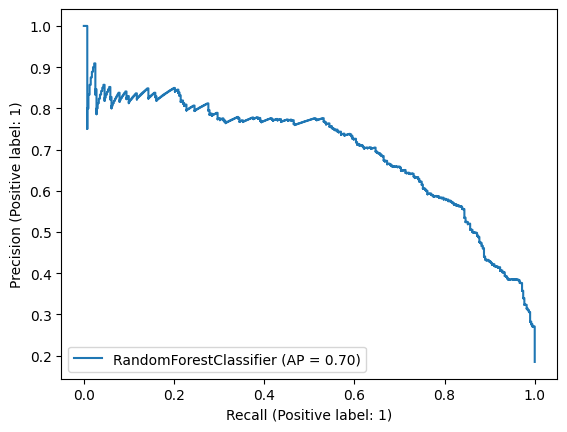

In [101]:
PrecisionRecallDisplay.from_estimator(rf, 
                                      X_test_count, 
                                      y_test);

In [102]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [104]:
rf = RandomForestClassifier(100, 
                            max_depth = 7, 
                            random_state = 42, 
                            n_jobs = -1, 
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [105]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1433  294]
 [  64  327]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1727
           1       0.53      0.84      0.65       391

    accuracy                           0.83      2118
   macro avg       0.74      0.83      0.77      2118
weighted avg       0.88      0.83      0.84      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15534
           1       0.58      0.89      0.70      3523

    accuracy                           0.86     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.86      0.87     19057



In [106]:
model = RandomForestClassifier(100, 
                               max_depth = 7, 
                               random_state = 42, 
                               n_jobs = -1, 
                               class_weight="balanced")
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842001
train_accuracy     0.866249
test_f1            0.658908
train_f1           0.709904
test_recall        0.824863
train_recall       0.884883
test_precision     0.548820
train_precision    0.592852
dtype: float64

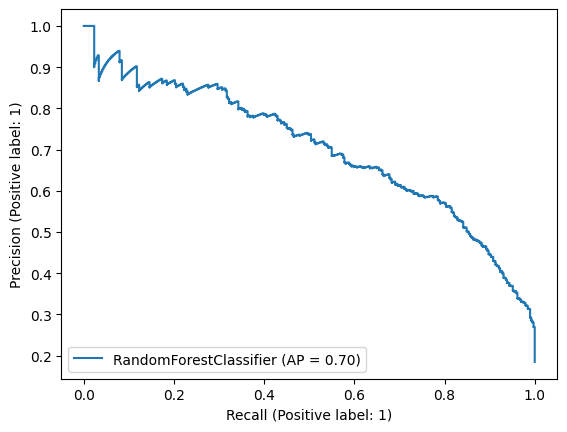

In [107]:
PrecisionRecallDisplay.from_estimator(rf, 
                                      X_test_tf_idf, 
                                      y_test);

In [109]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [111]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100, 
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [112]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1638   89]
 [ 168  223]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1727
           1       0.71      0.57      0.63       391

    accuracy                           0.88      2118
   macro avg       0.81      0.76      0.78      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     15534
           1       0.77      0.61      0.68      3523

    accuracy                           0.89     19057
   macro avg       0.84      0.78      0.81     19057
weighted avg       0.89      0.89      0.89     19057



In [113]:
model = AdaBoostClassifier(n_estimators= 100, 
                           random_state = 42)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.889175
train_accuracy     0.894008
test_f1            0.663536
train_f1           0.678427
test_recall        0.591257
train_recall       0.604820
test_precision     0.756811
train_precision    0.772458
dtype: float64

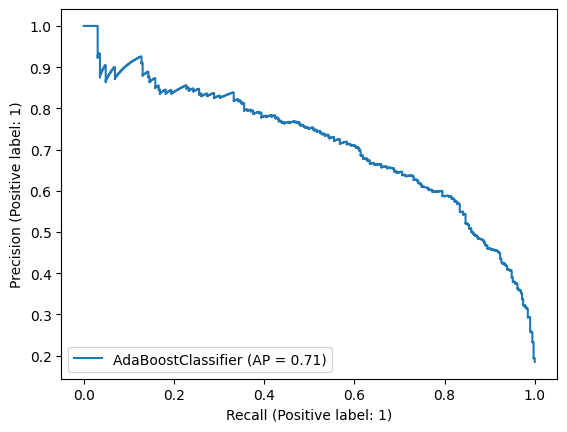

In [114]:
PrecisionRecallDisplay.from_estimator(ada, 
                                      X_test_count,
                                      y_test);

In [115]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [117]:
ada = AdaBoostClassifier(n_estimators= 100, 
                         random_state = 42, 
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [118]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1663   64]
 [ 192  199]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1727
           1       0.76      0.51      0.61       391

    accuracy                           0.88      2118
   macro avg       0.83      0.74      0.77      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15534
           1       0.80      0.54      0.65      3523

    accuracy                           0.89     19057
   macro avg       0.85      0.75      0.79     19057
weighted avg       0.88      0.89      0.88     19057



In [119]:
model = AdaBoostClassifier(n_estimators= 100, 
                           random_state = 42, 
                           learning_rate=0.7)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.886237
train_accuracy     0.894119
test_f1            0.632009
train_f1           0.658291
test_recall        0.529100
train_recall       0.551676
test_precision     0.786290
train_precision    0.816012
dtype: float64

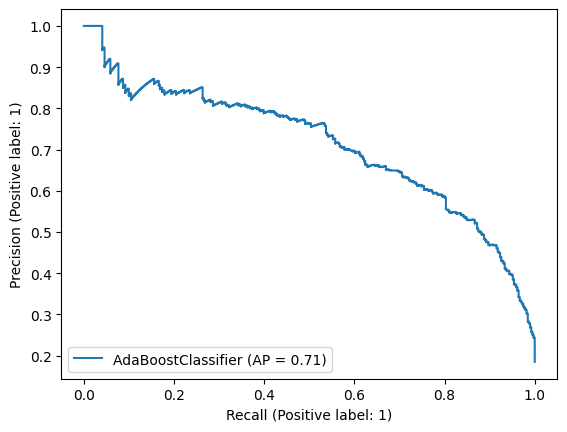

In [121]:
PrecisionRecallDisplay.from_estimator(ada, 
                                      X_test_tf_idf, 
                                      y_test);

In [122]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

### Tokenization

In [ ]:
num_words = 15001 
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [ ]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.mean()

60.2330106257379

In [ ]:
num_tokens.max()

116

In [ ]:
max_tokens = 116

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, 
                      maxlen = max_tokens)

In [ ]:
X_pad.shape

(21175, 116)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, 
                                                    y, 
                                                    test_size=0.1, 
                                                    stratify=y, 
                                                    random_state=101)

### Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2)) # dropout layer to avoid overfitting

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12)) # return_sequences default false since the following layer is dense layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid for binary data

In [ ]:
optimizer = Adam(learning_rate=0.001) # default lr givest the highest score

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=["Recall"])

In [ ]:
model.summary() 

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50 
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# define early stop for a potential overfitting
early_stop = EarlyStopping(monitor="val_recall", 
                           mode="max", 
                           verbose=1, 
                           patience = 2, 
                           restore_best_weights=True)

In [ ]:
# define class weights to use during fitting the model
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train) # blance the classes by taking y train into account
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [ ]:
# fit the model for 10 epochs with the batches of 128 samples
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
149/149 [==============================] - 31s 157ms/step - loss: 0.4632 - recall: 0.7550 - val_loss: 0.2889 - val_recall: 0.8824
Epoch 2/10
149/149 [==============================] - 21s 140ms/step - loss: 0.2520 - recall: 0.9228 - val_loss: 0.2776 - val_recall: 0.8645
Epoch 3/10
149/149 [==============================] - 21s 139ms/step - loss: 0.1913 - recall: 0.9478 - val_loss: 0.2620 - val_recall: 0.8261
Epoch 3: early stopping


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.463157,0.755038,0.288853,0.882353
1,0.252027,0.922793,0.277587,0.864450
2,0.191283,0.947772,0.262004,0.826087


<Axes: >

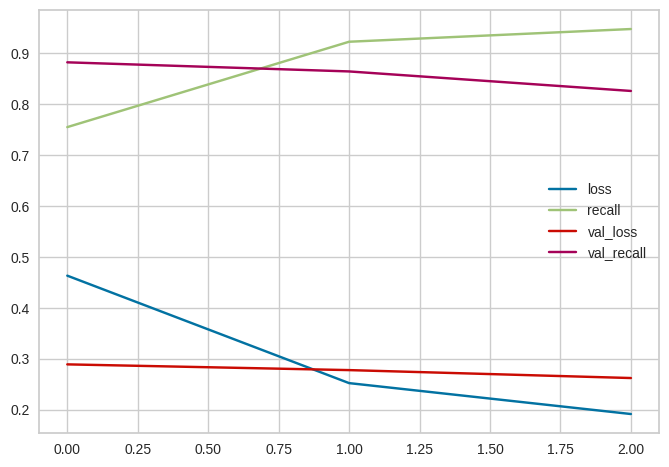

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 3s 23ms/step
[[1506  221]
 [  46  345]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.61      0.88      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.90      0.87      0.88      2118



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 11s 19ms/step
[[13964  1570]
 [  253  3270]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     15534
           1       0.68      0.93      0.78      3523

    accuracy                           0.90     19057
   macro avg       0.83      0.91      0.86     19057
weighted avg       0.93      0.90      0.91     19057



67/67 [==============================] - 1s 19ms/step


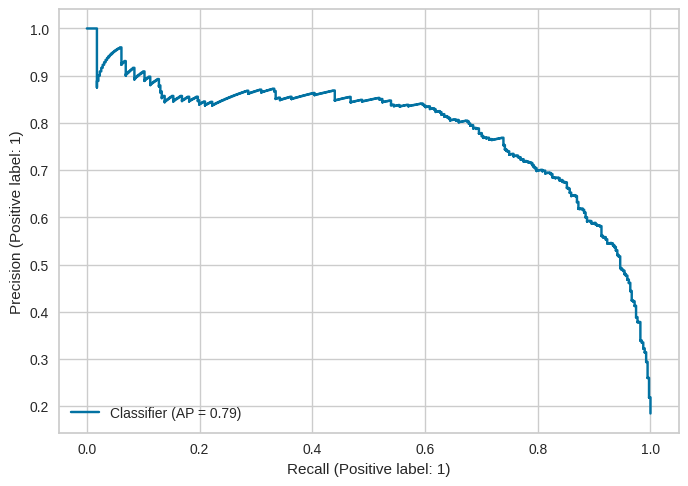

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

# PrecisionRecallDisplay.from_estimator(model, X_test, y_test) does not work in DL models. 
# PrecisionRecallDisplay fonksiyonu classification modellerinde çalışır. Ancak DL modellerinin
# classfication modeli olup/olmadığını anlayamadığı için hata döndürür.

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.788823236288221

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.5 MB/s eta 0:00:00


### Tokenization

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

In [ ]:
from transformers import AutoTokenizer #BertTokenizer

# https://huggingface.co/bert-base-uncased

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") # bert base uncased for an english data

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, 
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [ ]:
np.array(num_of_sent_tokens).mean()

76.31556080283353

In [ ]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, 
                                                        y, 
                                                        test_size=0.1, 
                                                        stratify=y, 
                                                        random_state=101)

In [ ]:
all_sentence_tokens = tokenizer(list(X), # except list format, it gives error (for arrays)
                                max_length=162, 
                                truncation=True,
                                padding='max_length', 
                                add_special_tokens=True)

In [ ]:
# check input embeddings
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [ ]:
# check attention mask
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X), 
                                  max_length=seq_len, 
                                  truncation=True,
                                  padding='max_length', 
                                  add_special_tokens=True) 

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
Xids_train

array([[ 101, 2025, 2469, ...,    0,    0,    0],
       [ 101, 3504, 2428, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1996, 6302, ...,    0,    0,    0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [ ]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, 
                                                    Xmask_train, 
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, 
                                                   Xmask_test, 
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Batch Size

In [ ]:
batch_size = 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [ ]:
# create own optimizer

from official.nlp import optimization

epochs = 2 # 3 epochs caused overfitting
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5 # higher scores with 0.00002

optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw') # adam weight decay to avoid overfitting

In [ ]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFAutoModel # we can also use TFBertModel, no difference
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32') # transformer models work only with int 32
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1] can be 
                                            # also used instead of pooler output

    x = Dense(80, activation='relu')(embeddings) # write the name of previous layer in functional api
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) #0.1 best practice 
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs) 

# my trials with different class weights (# weights = {0:0.30, 1:0.70}) ended up in worse scores.


Epoch 1/2
596/596 [==============================] - 242s 202ms/step - loss: 0.5538 - recall: 0.8445 - val_loss: 0.4709 - val_recall: 0.9028
Epoch 2/2
596/596 [==============================] - 63s 106ms/step - loss: 0.4421 - recall: 0.9097 - val_loss: 0.3813 - val_recall: 0.8824


## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.553777,0.844451,0.470890,0.902813
1,0.442076,0.909736,0.381258,0.882353


<Axes: >

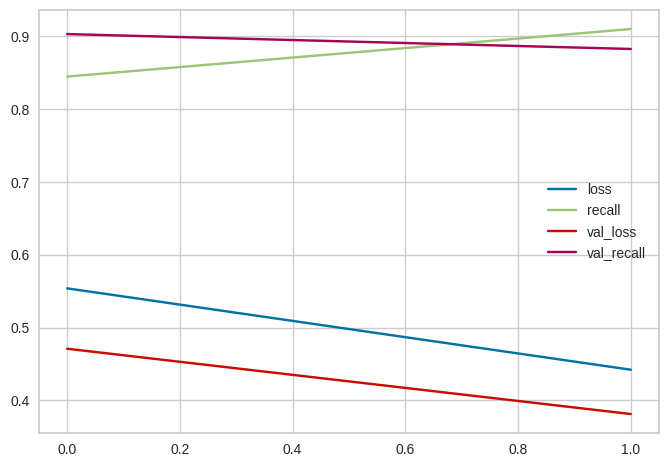

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1727
           1       0.81      0.88      0.84       391

    accuracy                           0.94      2118
   macro avg       0.89      0.92      0.90      2118
weighted avg       0.94      0.94      0.94      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

596/596 [==============================] - 22s 35ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15534
           1       0.89      0.92      0.91      3523

    accuracy                           0.97     19057
   macro avg       0.94      0.95      0.94     19057
weighted avg       0.97      0.97      0.97     19057



67/67 [==============================] - 3s 27ms/step


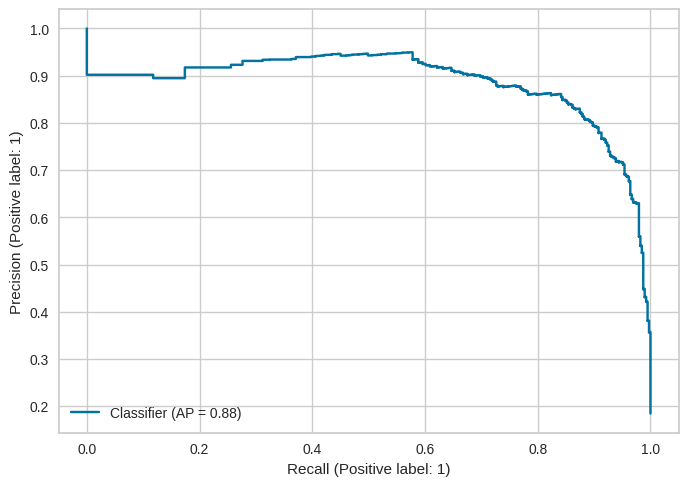

In [ ]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

# PrecisionRecallDisplay.from_estimator(model3, val_ds, y_test) DL modellerinde çalışmaz. 
# PrecisionRecallDisplay fonksiyonu classification modellerinde çalışır. Ancak DL modellerinin
# classfication modeli olup/olmadığını anlayamadığı için hata döndürür.

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.8842455381453453

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

## BERT Model with Weighted

In [ ]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [ ]:
weights = {0:0.18, 1:0.81}

In [ ]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
596/596 [==============================] - 204s 200ms/step - loss: 0.1264 - recall_1: 0.8958 - val_loss: 0.3331 - val_recall_1: 0.9335
Epoch 2/2
596/596 [==============================] - 63s 106ms/step - loss: 0.0933 - recall_1: 0.9466 - val_loss: 0.3692 - val_recall_1: 0.9361


In [ ]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1727
           1       0.75      0.94      0.83       391

    accuracy                           0.93      2118
   macro avg       0.87      0.93      0.89      2118
weighted avg       0.94      0.93      0.93      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred)) 

596/596 [==============================] - 23s 35ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15534
           1       0.82      0.97      0.89      3523

    accuracy                           0.96     19057
   macro avg       0.91      0.96      0.93     19057
weighted avg       0.96      0.96      0.96     19057



In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

67/67 [==============================] - 3s 27ms/step


0.9108050339701093

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

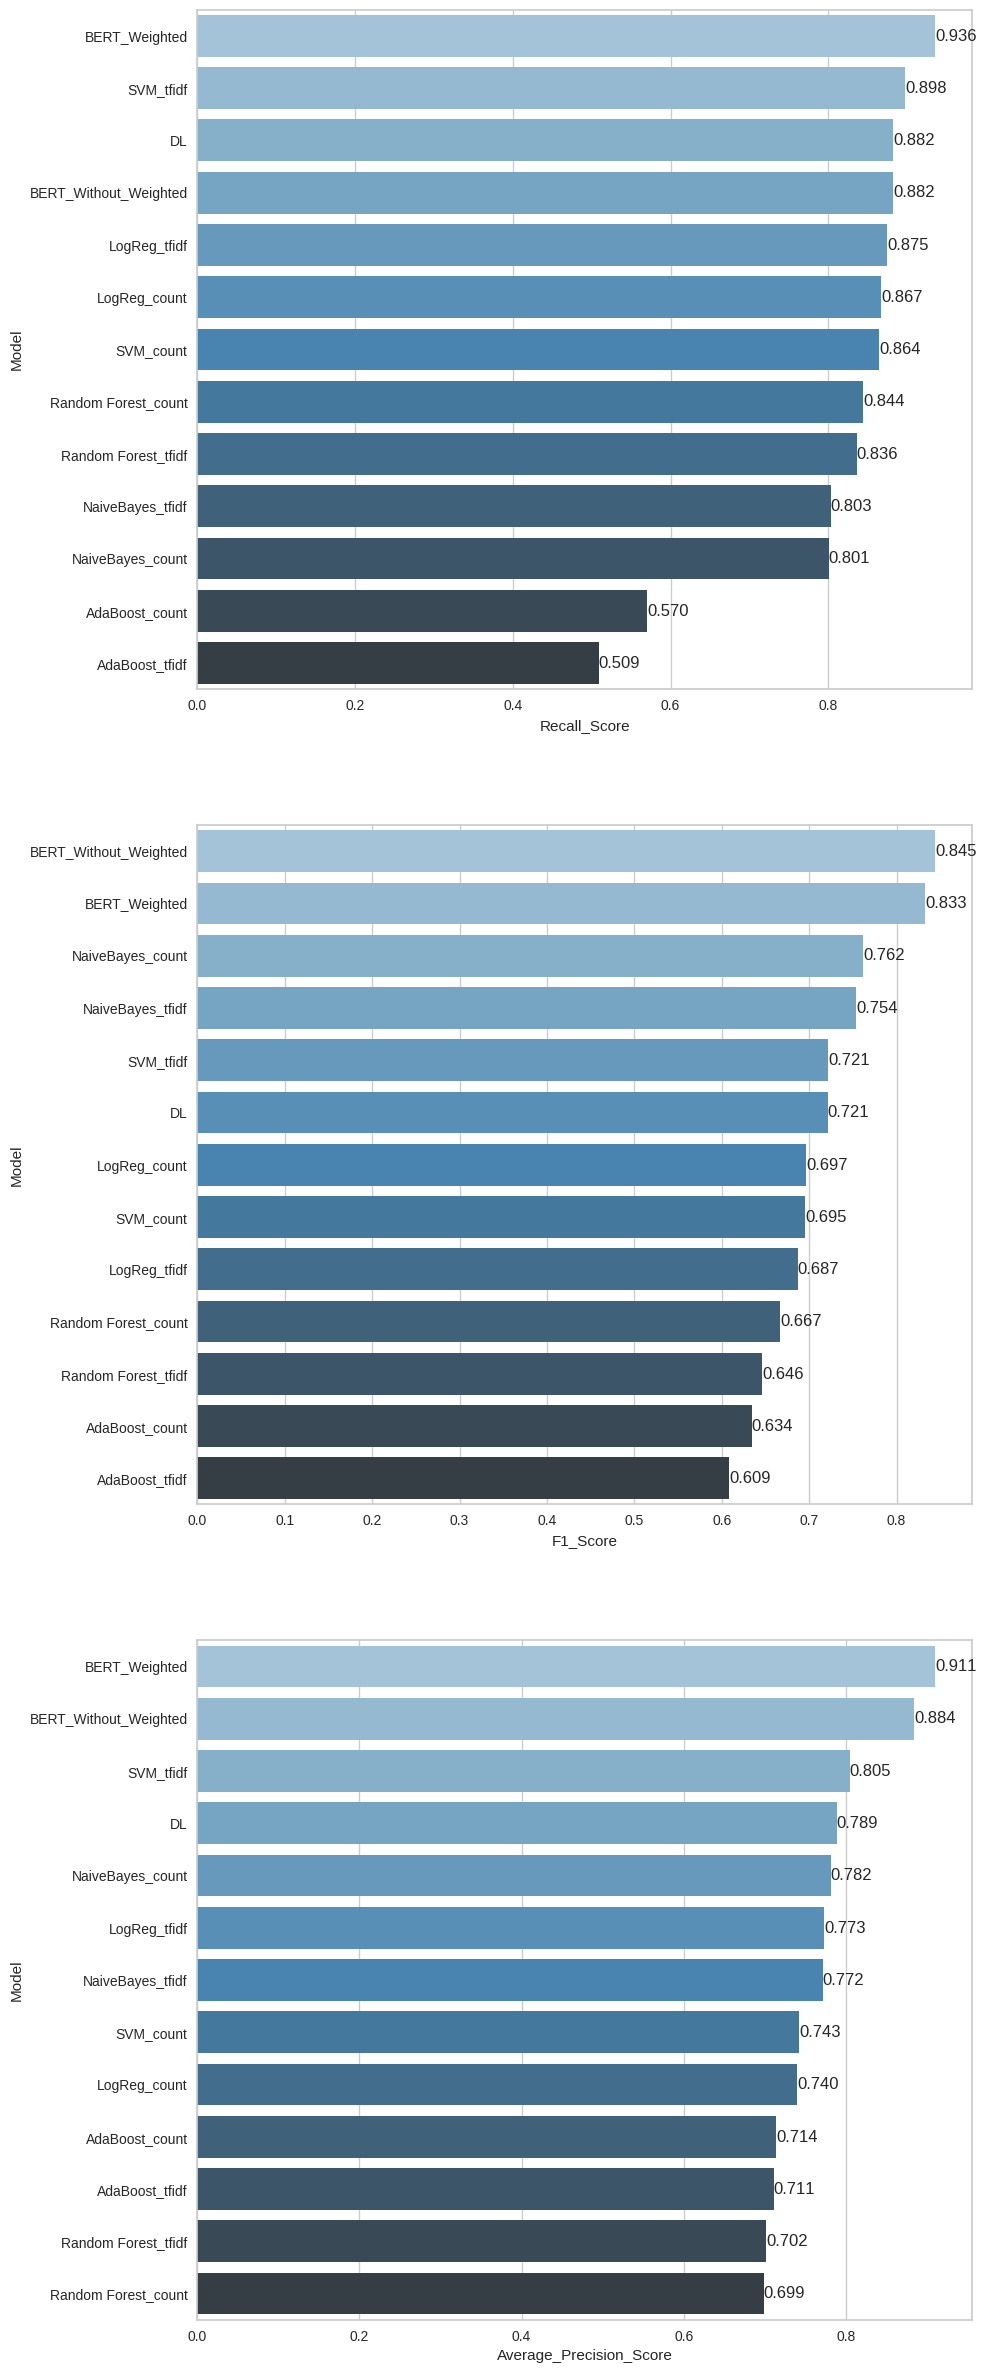

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1, 
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, 
                                     BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec, 
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, 
                                         BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf, 
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, 
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", 
                              ascending=False)
ax=sns.barplot(x="Recall_Score", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", 
                              ascending=False)
ax=sns.barplot(x="F1_Score", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", 
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## BERT Large Uncased

In [ ]:
#from transformers import AutoTokenizer
#tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")


#from transformers import TFAutoModel
#model = TFAutoModel.from_pretrained("bert-large-uncased")

### Conclusion

Bert weighted gives the best score for both recall and precision, therefore Bert weight can be used for this data.

In [ ]:
# to save it
# model3.save_weights("/content/drive/MyDrive/NLP/women_cloth_sentiment_model.h5")

# load the saved model
#with strategy.scope():

#  model4 = create_model()  # bu sifir bir model. best weightsi asagida yukluyoruz buna
#  model4.load_weights("/content/drive/MyDrive/NLP/women_cloth_sentiment_model.h5")

In [ ]:
# to get predictions
"""
# biraz prediction alarak modelimizi test edelim ve bu projeyi oyle sonlandiralim

# train ve test datasının gruplandırılmış tensorflow tensörlerine dönüştürülme işlemlerinin aynısını sırasıyla predict edeceğimiz observationlara(obs) aynen uyguluyoruz.

def prep_data(text):
  import tensorflow as tf
  
  # 1. Predict edeceğimiz yeni gözlemleri öncelikle token embeddings (input_ids) ve attention_mask matrixlerine dönüştürüyoruz.
  #    Bu fonksiyonu kullanabilmek için öncelikle transformation funksiyonunu çalıştırmanız gerektiğini unutmayın.
  Xids_obs, Xmask_obs = transformation(text) 
  
  # 2. Xids_obs, Xmask_obs matrixlerimizi gruplandırılmış tenserflow tensörlerine dönüştürüyoruz.
  dataset_obs = tf.data.Dataset.from_tensor_slices((Xids_obs, Xmask_obs))
  
  # 3. Dönüştürdüğümüz gruplandırılmış tensorflow tensörlerini modelin tanıyabilmesi için "input_ids" ve "attention_mask" olarak isimlendiriyoruz.
  def map_func(Tensor_Xids, Tensor_Xmask):
       return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}
  
  dataset_obs = dataset_obs.map(map_func)

  # 4. Son aşama olarak gruplandırılmış tensorflow tensörlerimizi train datasında olduğu gibi 32'li paketler haline getiriyoruz. Yoksa shape uyumsuzluk hatası alırız. 
  batch_size = 32 # eğitim datasına uygulanan batch_size'ı uyguluyoruz.
  obs_ds = dataset_obs.batch(batch_size)

  return obs_ds 
"""

In [ ]:
"""
review1 = "the short looked great on the photos but it's just horrible"
review2 = "great seller super product, many thanks"
review3 = "despite the shipping problems I am giving 5 stars to the seller bec of the product quality"
review4 = "it could be better"
review5 = "it sucks!"

reviews = [review1, review2, review3, review4, review5] 
"""

In [ ]:
"""
obs_ds = prep_data(reviews)

# Datamızı gruplandırılmış tensorflow tensörlerine dönüştürüyoruz.
"""

In [ ]:
"""
probs = model4.predict(obs_ds)
probs
# predictions
"""

In [ ]:
"""
probs = [i[0] for i in probs]
probs
"""

In [ ]:
"""
classes  = (np.array(probs) >= 0.5).astype("int")
classes
"""

In [ ]:
"""
my_dict = {"Review":reviews, "prob":probs, "classes":classes}
"""

In [ ]:
"""
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)
"""